In [ ]:
import matplotlib.pyplot as plt
from lib import evaluate, LunarLanderQNetwork, DQN_Trainer
import gymnasium as gym

In [2]:
env = gym.make("LunarLander-v3", render_mode="rgb_array")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
state_dim, action_dim


(8, np.int64(4))

[DQN] Episode 0, Reward: -268.4, Epsilon: 1.000, loss: 165.393
[DQN] Episode 50, Reward: -68.8, Epsilon: 0.781, loss: 10.417
[DQN] Episode 100, Reward: -88.2, Epsilon: 0.610, loss: 180.462
[DQN] Episode 150, Reward: -71.5, Epsilon: 0.478, loss: 2.326
[DQN] Episode 200, Reward: -111.0, Epsilon: 0.374, loss: 4.204
[DQN] Episode 250, Reward: 56.0, Epsilon: 0.294, loss: 6.295
[DQN] Episode 300, Reward: -74.3, Epsilon: 0.231, loss: 1.688
[DQN] Episode 350, Reward: -65.7, Epsilon: 0.182, loss: 0.714
[DQN] Episode 400, Reward: -17.9, Epsilon: 0.144, loss: 1.166
[DQN] Episode 450, Reward: -59.2, Epsilon: 0.114, loss: 0.606
[DQN] Episode 500, Reward: -53.6, Epsilon: 0.091, loss: 0.544
[DQN] Episode 550, Reward: 199.8, Epsilon: 0.073, loss: 2.206
[DQN] Episode 600, Reward: 46.0, Epsilon: 0.059, loss: 1.482
[DQN] Episode 650, Reward: 243.5, Epsilon: 0.048, loss: 0.770
[DQN] Episode 700, Reward: 254.2, Epsilon: 0.040, loss: 1.544
[DQN] Episode 750, Reward: 141.3, Epsilon: 0.033, loss: 1.084
[DQN] 

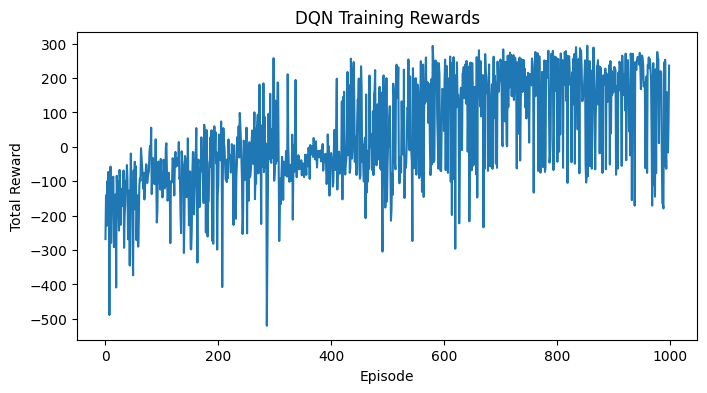

In [3]:
from copy import deepcopy
policy_network = LunarLanderQNetwork(state_dim=8, action_dim=4)
target_network = deepcopy(policy_network)
dqn_trainer = DQN_Trainer(env=env, policy_net=policy_network, target_net=target_network, device="mps")
dqn_rewards = dqn_trainer.dqn(
    num_episodes=1000,
    batch_size=64,
    learning_rate=1e-3,
    step_lr_decay=0.5,
    step_lr_episode=200,
    epsilon_decay=200,
    print_freq=50,
    model_save_freq=50,
    target_update_freq=25,
)


# 학습 보상 시각화
plt.figure(figsize=(8,4))
plt.plot(dqn_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("DQN Training Rewards")
plt.show()

In [ ]:
import torch
import os
policy_net = LunarLanderQNetwork(state_dim=8, action_dim=4)
path = "LunarLander-v3_20250214-1752/850.pth"
dir, num_episode = os.path.split(path)
num_episode = num_episode.split(".")[0]

policy_net.load_state_dict(torch.load(path))
eval_rewards_dqn = evaluate(env, policy_net, n_episodes=3, max_step=500, save_dir=f"{dir}", model_path = f"{num_episode}"
)

2025-02-17 15:39:45.190 python[86167:10933739] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-17 15:39:45.190 python[86167:10933739] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Evaluation Episode 0 Reward: 256.18157701930704
video is saved in LunarLander-v3_20250214-1752/eval_0.mp4
Evaluation Episode 1 Reward: -66.68832625468086
video is saved in LunarLander-v3_20250214-1752/eval_1.mp4
Evaluation Episode 2 Reward: 249.78156271282344
video is saved in LunarLander-v3_20250214-1752/eval_2.mp4
